# Ejercicio 3 - Problema de la Moneda

Entra como parámetro una cadena de caracteres que representan resultados del lanzamiento de una moneda. La idea es construir la función "Posterior" asociada a los resultados de los lanzamientos. 

Wikipedia dice: "The posterior probability distribution of one random variable (el proximo resultado) given the value of another (la cadena que entra como parámetro) can be calculated with Bayes' theorem by multiplying the prior probability distribution by the likelihood function, and then dividing by the normalizing constant.

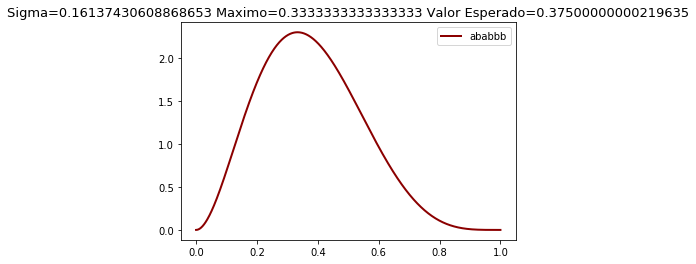

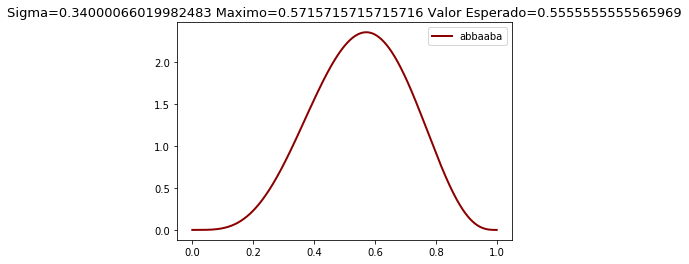

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#Se construye una función posterior cuya entrada son los resultados de una cierta cantidad de lanzamientos
def posterior(s): 
    p = np.linspace(0,1,1000)      #linspace para graficar y calcular, va de 0 a 1 por ser densidades de prob.
    Prior = [np.random.random()]*1000 #Prior, lo asumo uniforme porque no se en principio nada
                                      #tomo como referencia un resultado (e.g. obtener cara en el proximo lanzamiento)
        
    #Se hace un conteo de caras y sellos
    Na = s.count("a")
    Nb = s.count("b") 
    
    #Se define el likelihood, esto tiene forma binomial debido a que son solo 2 posibles resultados 
    #tomaré como referencia "a", es decir: p(a)*p('no sea a') = (p**Na)((1-p)**Nb)
    
    Likelihood = (p**Na)*((1.0-p)**Nb)
    
    #Según Wikipedia, esta es la forma de la "posterior", no olvidar la normalización
    
    post = (Likelihood*Prior)
    norm = (np.trapz(post, p)) #esto hace una integral Post(p=, acá se pone (f(x),x) si se quiere integrar f(x)dx
   
    PosteriorNorm = post/norm  #Posterior Normalizada
    
    #Valores esperados
    E_x = np.trapz(p*PosteriorNorm, p)  #Esto me da el valor esperado recordar forma de un promedio Int(P(x)*x)dx
    E_x2 = np.trapz((p**2)*PosteriorNorm, (p**2)) #Esto me da el valor esperado de x**2 Int(P(x)*(x**2))dx
    
    sigma = np.sqrt(E_x2-(E_x)**2)     #Desvest es la raiz del promedio de x**2 menos el promedio de x al cuadrado.
    pico = p[np.argmax(PosteriorNorm)] #Maximo de la distribución
    val_esp = E_x                      #Valor esperado
    
    plt.figure()
    plt.title("Sigma="+str(sigma)+" "+"Maximo="+str(pico)+" "+"Valor Esperado="+ str(val_esp), fontsize=13)
    plt.plot(p,PosteriorNorm, linewidth=2, color="darkred", label=str(s))
    plt.legend(loc="best")
 

#Graficas de las posterior para un par de cadenas
posterior("ababbb")
posterior("abbaaba")